# Machine Learning 
## Exercise 1: Regression and Classification
## Academic Year 2019-2020
### Evangelia Santorinaiou

### Libraries

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import preprocessing

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import metrics
from sklearn.metrics import accuracy_score
from collections import defaultdict

import pprint as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

The task of this project is to learn a set of models for a bike sharing system dataset.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back to another position. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.


## Exploratory Analysis

The first thing I did before I start building my models was to plot the 'cnt' distribution. 'cnt' is the target of the models I will make and it is the total rental bikes including both casual and registered. I removed the first two columns of the dataset because the first was index and the second dates, thus they would not provide any usefull information. Αlso 'registered' and 'casual' as they give us the 'cnt' that is the y that we are looking for.

In [2]:
df = pd.read_csv("day.csv")
                 
X = df.loc[:, df.columns[2:13]]
Y = df.loc[:, df.columns[15]]

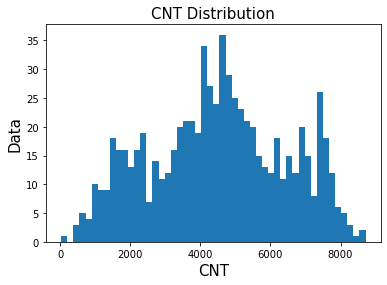

In [3]:
plt.hist(Y, bins=50)
plt.title('CNT Distribution', fontsize=15)
plt.xlabel('CNT', fontsize=15)
plt.ylabel('Data', fontsize=15);

In [4]:
X.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463


In [5]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


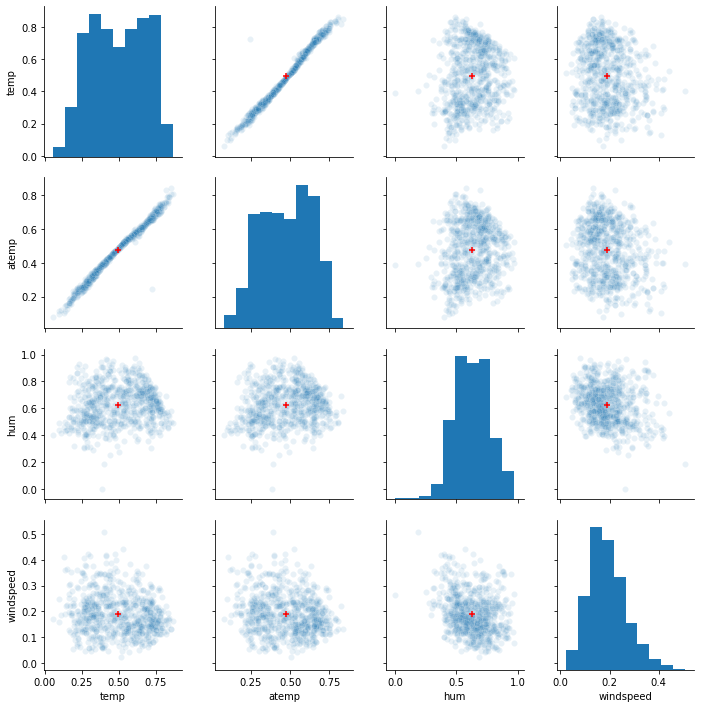

In [84]:
def plot_mean(xdata, ydata, **kwargs):
    if xdata is ydata:
        return
    
    x = xdata.mean()
    y = ydata.mean()
    plt.scatter(x, y, color='r', marker='+')
    
g = sns.pairplot(X[['temp', 'atemp', 'hum', 'windspeed']], plot_kws={'alpha': 0.1})
g.map(plot_mean)

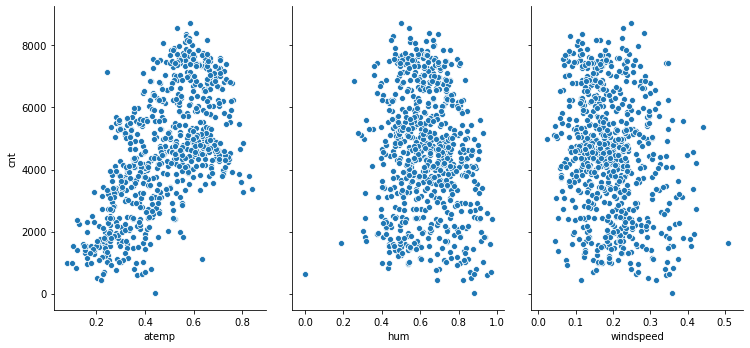

In [94]:
sns.pairplot(df, x_vars=['atemp', 'hum', 'windspeed'], y_vars='cnt', height=5, aspect=0.7);

###  Decision Tree

a) *Treating the problem as a classification problem 1 , use a decision tree to learn a classification model
that predicts the number of persons that used a bicycle (column “cnt”) based on the available features.
Ensuring that overfitting has not occurred, use the learned model to identify the two most prominent
features.*


To create the classes for the classification decision tree I used the digitize from numpy and I splitted the classes following the cnt distribution in order to have as much balanced tree as possible. 

I run DecisionTreeClassifier without any hyperparameter and the accuracy was 0.72. After that I used GridSearchCV to find the best hyperparameters in order to improve my accuracy. For max_depth I tried [4, 5, 8]  and the min_samples_leaf to [2, 5, 10]. The accuracy increased from 0.72 to 0.86, and the best parameters were {'max_depth': 4, 'min_samples_leaf': 5}.

I fit the model with and without 'temp'. The accuracy improved only by 0.01 when I removed it.

In [38]:
bins = [0, 1000, 1500, 2500,  3500, 4000, 5000, 6000, 7000, 9000]
Y = np.digitize(Y, bins)
Y = list(map(str,Y))

In [86]:
X = X.drop(['temp'], axis=1)

In [87]:
dtree = DecisionTreeClassifier(criterion='entropy')

scores = cross_validate(dtree, X, Y, cv=5,
                         scoring=('accuracy'),
                         return_train_score=True)

print(scores['test_score'].mean())

0.7344422700587083


/home/eva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
dtree = DecisionTreeClassifier(criterion='entropy')
param_dict = {'max_depth': [4, 5, 8],
               "min_samples_leaf":[2, 5, 10]}
estimator = GridSearchCV(dtree, param_dict, verbose=2)
estimator.fit(X_train, Y_train)

Y_pred= estimator.predict(X_test)
print("The best parameters: {0}".format(estimator.best_params_))
print('Accuracy : ', metrics.accuracy_score(Y_test, Y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] .................. max_depth=4, min_samples_leaf=2, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] .................. max_depth=4, min_samples_leaf=2, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] .................. max_depth=4, min_samples_leaf=2, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] .................. max_depth=4, min_samples_leaf=2, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] .................. max_depth=4, min_samples_leaf=2, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5 .................................
[CV] .................. max_depth=4, min_samples_leaf=5, total=   0.0s
[CV] max_depth=4, min_samples_leaf=5 .................................
[CV] ............

/home/eva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. max_depth=8, min_samples_leaf=2, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2 .................................
[CV] .................. max_depth=8, min_samples_leaf=2, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2 .................................
[CV] .................. max_depth=8, min_samples_leaf=2, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2 .................................
[CV] .................. max_depth=8, min_samples_leaf=2, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2 .................................
[CV] .................. max_depth=8, min_samples_leaf=2, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] .................. max_depth=8, min_samples_leaf=5, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] .................. max_depth=8, min_samples_leaf=5, total=   0.0s
[CV] max_depth=8, min_samples_leaf=5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


To find the two most prominent features I used 'feature_importances_'. As we can see the first one is **atemp** with importance 0.53, that makes sense because the better the temperature is the more possible is to rent a bike, the second is  **year** with 0.15 importance.

In [89]:
features = estimator.best_estimator_.feature_importances_
ft_df = pd.DataFrame(data=features, index=X.columns)
ft_df.columns = ['Importance']
ft_df.sort_values(by=['Importance'],  ascending=False)

,Importance
atemp,0.531485
yr,0.145008
season,0.140317
hum,0.127677
windspeed,0.019838
workingday,0.019749
weathersit,0.015926
mnth,0.000000
holiday,0.000000
weekday,0.000000


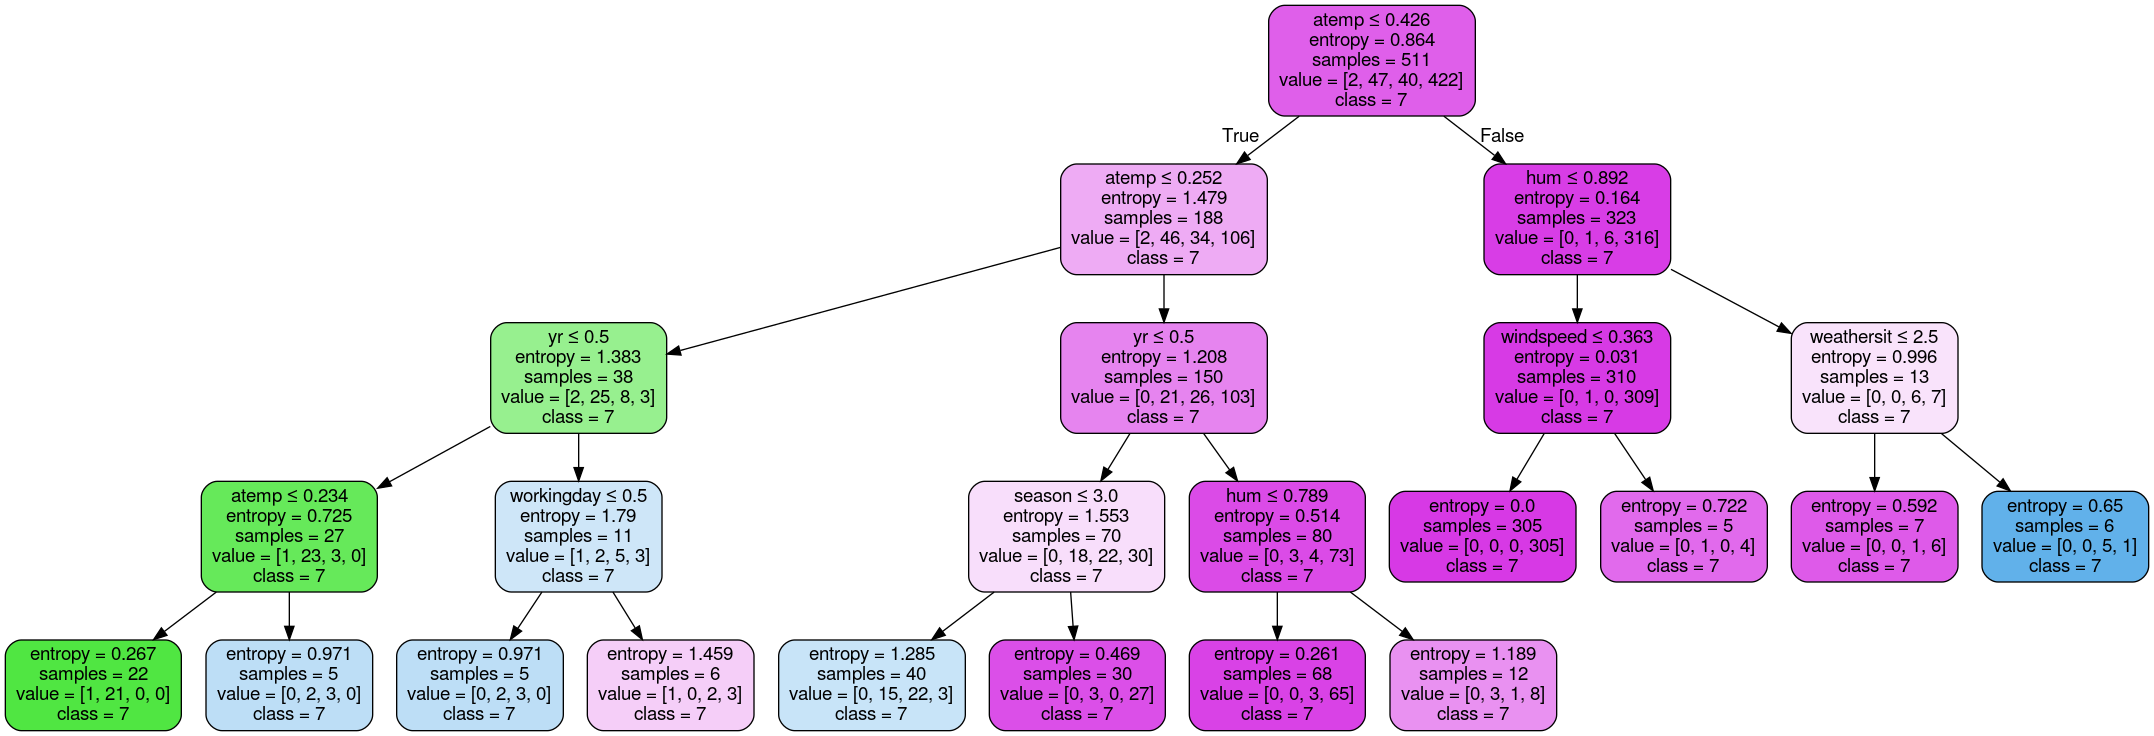

In [91]:
dot_data = StringIO()
Υ = np.unique(Y).sort()
export_graphviz(estimator.best_estimator_, out_file=dot_data,
                feature_names=X.columns,  
                class_names=Y,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Regression

Here there are some common functions I used both in linear and logistic regression. First method is a *batch generator* for the implementation of minibatch gradient descent. It shuffles the indexes and takes 64 datapoints. *run_gradient* runs gradient descent for some epochs we set, and when it ends it returns the costs and the metrics. cost_function and metric are passed as arguments in order to run for linear and logistic regression. Also, *plot_convergence* is used to plot the convergence of train and test loss for each epoch.

### Common Functions 

In [102]:
def batch_generator(X, Y, batch_size=64):
    number_of_batches = X.shape[0]//batch_size
    counter = 0
    sample_index = np.arange(X.shape[0]) 
    np.random.shuffle(sample_index)

    while counter < number_of_batches:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        x_batch = X[batch_index,:]
        y_batch = Y[batch_index]
        counter += 1
        yield x_batch, y_batch

In [178]:
def run_gradient(epochs, X_train, Y_train, X_test, Y_test, batch_size, 
                 gradient_descent_step, cost_function, metric_func, Y_pred_func, a):
    weights = np.ones(X_train.shape[1] + 1)
    metric = []
    costs = []
    for epoch in range(epochs):
        cost = 0
        for x_batch, y_batch in batch_generator(X_train, Y_train, batch_size):
            x_batch = np.c_[np.ones(x_batch.shape[0]), x_batch]
            weights = gradient_descent_step(x_batch, y_batch, a, weights)
            cost += cost_function(x_batch, weights, y_batch)
        costs.append(cost)
        Y_pred = Y_pred_func(X_test, weights)
        metric.append(metric_func(Y_test, Y_pred))
    return costs, metric

In [100]:
def plot_convergence(test_loss, train_loss,  a, logistic=False):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax[0].plot(np.arange(len(train_loss)), train_loss)
    ax[0].set_xlabel("Time in epochs")
    ax[0].set_ylabel('Train Loss')
    ax[0].set_title('alpha='+ str(a))
    
    ax[1].plot(np.arange(len(test_loss)), test_loss)
    ax[1].set_xlabel("Time in epochs")
    if logistic:
        ax[1].set_ylabel('Accuracy')
    else:
        ax[1].set_ylabel('MSE Test')
    ax[1].set_title('alpha='+ str(a))

## Linear Regression


b) Treating the learning task as a regression problem, develop a linear regression object that predicts the
number of persons that used a bicycle from all the available numeric features. Perform the experiment
3 times, each time with a different learning rate a, and plot the loss with respect to the training epochs
required for the model to converge 2 . Which value of a has been more suitable and why? For one of
the two prominent features selected in step a), and by using only a single instance from the training
set, plot the loss with respect to (y − ŷ). Finally, describe your processing workflow for modelling
the data.


To predict the the number of persons that used a bicycle I used all the numeric features to build a linear regression model.

I also normalized the X values.

### Cost Function
* $y(x_{i})$: real y
* $h(x_{i})$ : predicted y
* $\|\mathbf{w}\|^{2}=w_{0}^{2}+w_{1}^{2}+\ldots+w_{M}^{2}$

I used L2 regularization in order to 'punish' the big values of w.

$$ J\left(w_{0}, w_{1}\right)=\frac{1}{2 n} \sum_{i=0}^{n}\left(y\left(x_{i}\right)-h\left(x_{i}\right)\right)^{2} + \underbrace{\lambda \frac{\|\mathbf{w}\|^{2}}{2}}_{\text {regularization term }}$$

In [96]:
def linear_cost_function(x_batch, weights, y_batch):
    lamda = 0.01
    return (np.sum(np.square(x_batch @ weights - y_batch)) + lamda/2 * np.sum(weights**2)) / (2*x_batch.shape[0]) 

### Gradient Descent

$\alpha$ is the leraning rate and w the weight that will be upgraded in each iteration.

 $$ \vec{w}=\vec{w}-\alpha \frac{\partial J\left(w_{1}, w_{2}\right)}{\partial \vec{w}} $$

In [104]:
def gradient_descent_step(x_batch, y_batch, alpha, weights):
    weights -= alpha*(x_batch.T @ (x_batch @ weights - y_batch))/ x_batch.shape[0]
    return weights

In [97]:
def mean_square_error(Y_test, Y_pred):
    return np.mean(Y_test - Y_pred)**2

In [98]:
def get_Ypred(X_test, weights):
    return np.c_[np.ones(X_test.shape[0]), X_test] @ weights  

I fitted the model with 3 different learning rates, 0.01, 0.05 and 0.1. As we can see with 0.1 it converges quicker.

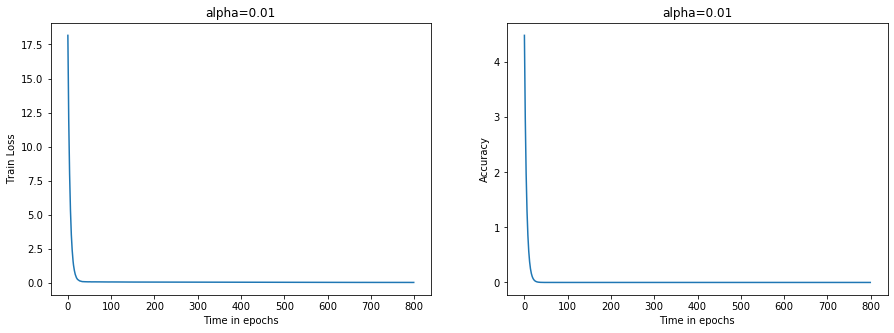

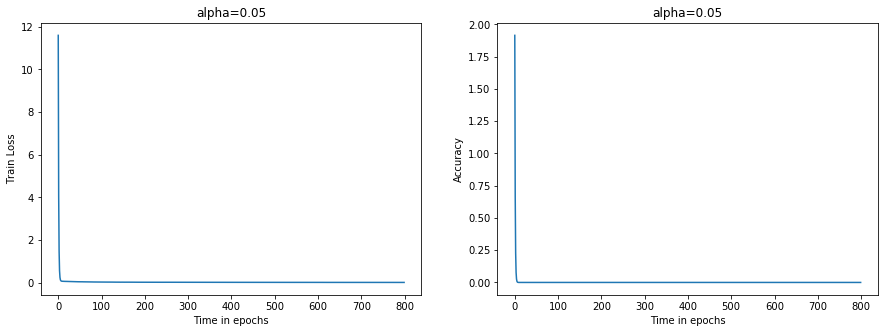

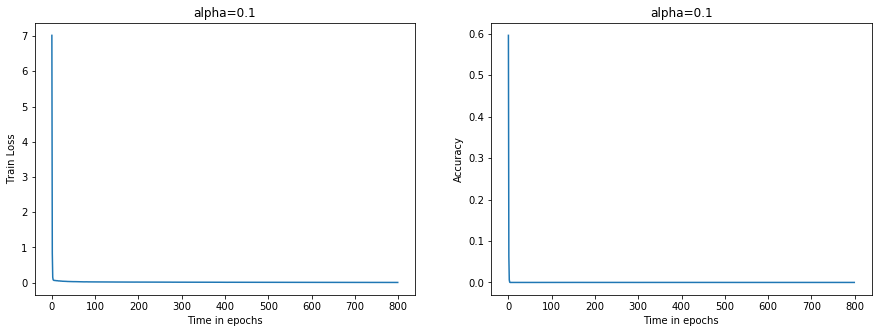

In [105]:
X = df.loc[:, df.columns[2:13]].values
Y = df.loc[:, df.columns[15]].values
X = (X-X.min()) / (X.max()-X.min())
Y = Y/Y.sum()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


alpha = [0.01, 0.05, 0.1]

batch_size = 64
epochs = 800
for a in alpha:
    costs, mse_test = run_gradient(epochs, X_train, Y_train, X_test, Y_test, 
                                   batch_size, gradient_descent_step, linear_cost_function,
                                   mean_square_error, get_Ypred, a)
                                   
    plot_convergence(mse_test, costs, a, epochs)

In [106]:
np.mean(mse_test)

0.0008657285069331255

I used 'temp' from features and row 100 for my training instance. As we can see, as the train loss is reduced, the mean square error also is reduced.

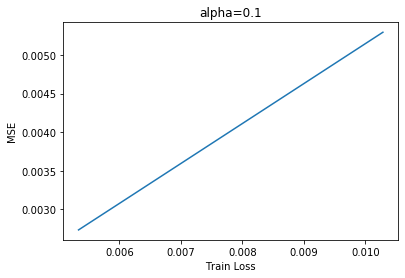

In [119]:
X_instance = np.array(X_train[100][9])
Y_instance = Y_train[100]
alpha = 0.1
lamda = 0.01
weights = 1
diff = []
costs = []
for epoch in range(epochs):
    cost = 0
    Y_pred = X_instance * weights  
    weights -= alpha*(X_instance * (y_pred - Y_instance))
    
    cost += np.square(X_instance * weights - Y_instance) + lamda/2 * weights**2 
    diff.append(mean_square_error(Y_instance, Y_pred))
    costs.append(cost)
    

plt.plot(costs, diff)

plt.xlabel("Train Loss")
plt.ylabel('MSE')

plt.title('alpha='+ str(alpha));

## Logistic Regression

c)Treating the problem as a binary classification problem, apply logistic regression that predicts the if
“few” or “many” persons have used a bicycle from all the available numeric features. For one of the
two prominent features selected in step a), plot the loss with respect to (y − ŷ).

I splitted the 'cnt' in two classes, 0-5000 and 5000-9000. 

In [169]:
df = pd.read_csv("day.csv")
X = df.loc[:, df.columns[2:13]].values
X = (X-X.min()) / (X.max()-X.min())

Y = df.loc[:, df.columns[15]].values
bins = [0, 5000, 9000]
Y = np.digitize(Y, bins)
Y[Y == 1] = 0
Y[Y == 2] = 1


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


### Cost Function

$$ J(w)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(h_{w}\left(x^{(i)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{w}\left(x^{(i)}\right)\right)\right] + \frac{\lambda}{2}\|\mathbf{w}\|^{2}$$

In [125]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [126]:
def logistic_cost_function(x_batch, weights, y_batch):
    y_pred = sigmoid(x_batch @ weights)
    return (-np.sum([y_batch.T * np.log(y_pred) + (1 - y_batch).T * np.log(1 - y_pred)]) + np.sum(weights**2))/ x_batch.shape[0]

$$ \frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{a}{m} \sum_{i=1}^{m}\left(h\left(x^{i}\right)-y^{i}\right) x_{j}^{i} $$

In [127]:
def logistic_gradient_descent_step(x_batch, y_batch, alpha, weights):
    y_pred = sigmoid(x_batch @ weights)  
    weights = weights - alpha*(x_batch.T @ (y_pred - y_batch))/ x_batch.shape[0] 
    return weights

In [137]:
def logistic_accuracy(Y_test, Y_pred):
    Y_pred[Y_pred >= 0.5] = 1
    Y_pred[Y_pred < 0.5] = 0
    return metrics.accuracy_score(Y_test, Y_pred)

In [129]:
def get_logistic_prediction(X_test, weights):
    return sigmoid(np.c_[np.ones(X_test.shape[0]), X_test] @ weights)


Accuracy for a= 0.01 0.6590056818181819
Accuracy for a= 0.05 0.6827727272727273
Accuracy for a= 0.1 0.7160795454545457


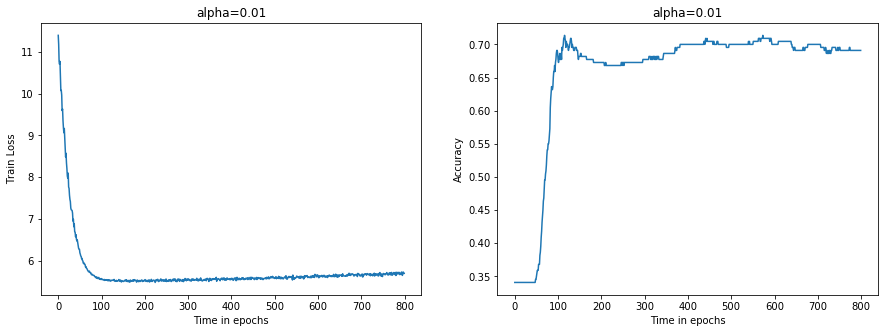

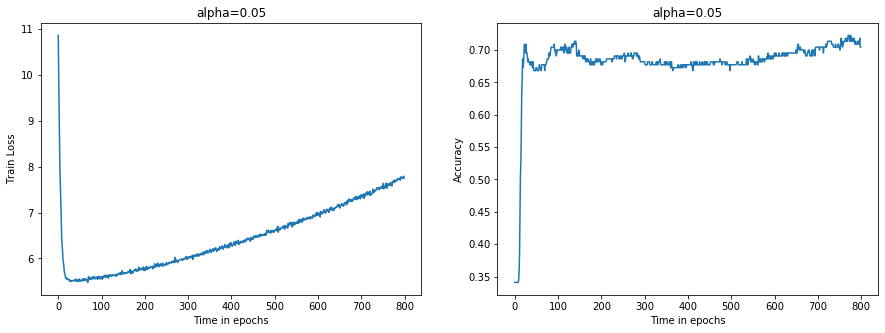

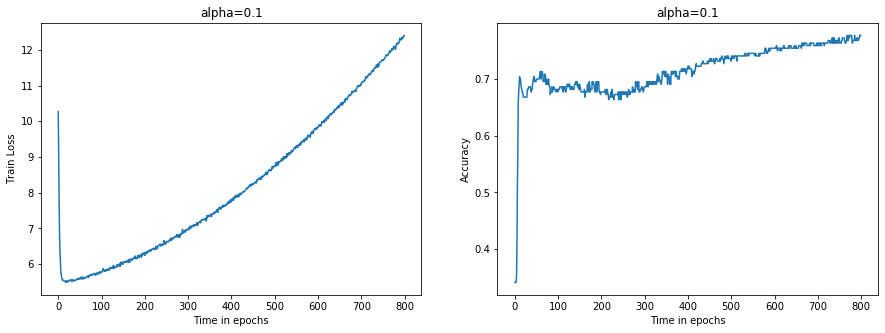

In [171]:
batch_size = 64
epochs = 800


alpha = [0.01, 0.05, 0.1]

batch_size = 64
epochs = 800
for a in alpha:
    costs, acc = run_gradient(epochs, X_train, Y_train, X_test, Y_test, 
                                   batch_size, logistic_gradient_descent_step, logistic_cost_function,
                                   logistic_accuracy, get_logistic_prediction, a)
                                   
    plot_convergence(acc, costs,  a, epochs)
    print('Accuracy for a=', a,  np.mean(acc))

To implement the regressions I didn't add any regularization that would improve my score but still 0.91 is good enough.


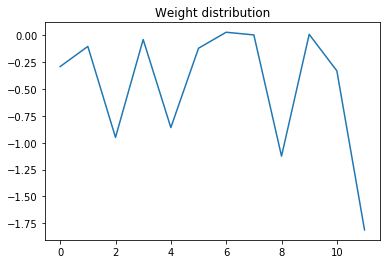

In [159]:
plt.plot(weights)
plt.title('Weight distribution');

I run also the LogisticRegression from sklearn to compare the accuracy.

In [160]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.75

In [219]:
X_best_f = X_train[:,8][:,None]
weights = np.ones(X_best_f.shape[1] + 1)
acc = []
costs = []
a = 0.01
epochs = 300
for epoch in range(epochs):
    cost = 0
    for x_batch, y_batch in batch_generator(X_best_f, Y_train, batch_size):
        x_batch = np.c_[np.ones(x_batch.shape[0]), x_batch]
        weights = logistic_gradient_descent_step(x_batch, y_batch, a, weights)
        cost += logistic_cost_function(x_batch, weights, y_batch)
    costs.append(cost)
    Y_pred = get_logistic_prediction(X_test[:,7][:,None], weights)
    acc.append(logistic_accuracy(Y_test, Y_pred))

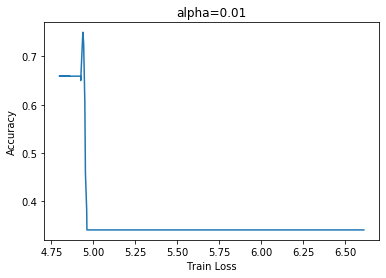

In [222]:
plt.plot(costs, acc, )

plt.xlabel("Train Loss")
plt.ylabel('Accuracy')

plt.title('alpha='+ str(a));